In [ ]:
install.packages("lmtest")
library("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
df = read.table('/content/sample_data/2.txt', header = TRUE, dec=',', sep='\t')
df

y,x1,x2
<chr>,<dbl>,<dbl>
7,3.90,10.0
7,3.90,14.0
7,3.70,15.0
7,4.00,16.0
7,3.80,17.0
7,4.80,19.0
8,5.40,19.0
8,4.40,20.0
8,5.30,20.0


In [ ]:
df1 = df[21:23,c(2,3)]
df = df[1:20,]
df1

,x1,x2
,<dbl>,<dbl>
21,6.19,22.3
22,9.60,36.0
23,3.70,10.0


In [ ]:
df$y = as.numeric(df$y)
df

,y,x1,x2
,<dbl>,<dbl>,<dbl>
1,7,3.9,10
2,7,3.9,14
3,7,3.7,15
4,7,4.0,16
5,7,3.8,17
6,7,4.8,19
7,8,5.4,19
8,8,4.4,20
9,8,5.3,20


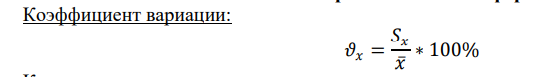

In [ ]:
#Задание 1

print(c("Коэф вариации y:", sd(df[,1]) / mean(df[,1]) * 100))

print(c("Коэф вариации фактора x1:", sd(df[,2]) / mean(df[,2]) * 100))
print(c("Коэф вариации фактора x2:", sd(df[,3]) / mean(df[,3]) * 100))

[1] "Коэф вариации y:" "25.6048897696701"
[1] "Коэф вариации фактора x1:" "31.3210557458595"         
[1] "Коэф вариации фактора x2:" "30.5563772496108"         


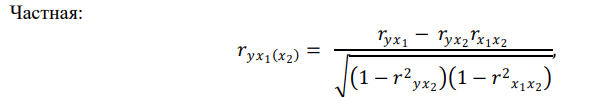

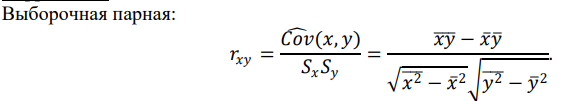

In [ ]:
#Задание 2
cor_y_x1 = cor(df[,1], df[,2])
cor_y_x2 = cor(df[,1], df[,3])
cor_x1_x2 = cor(df[,2], df[,3])

pr_cor_y_x1_x2 = (cor_y_x1 - cor_x1_x2 * cor_y_x2) / sqrt((1 - cor_x1_x2 ^ 2) * (1 - cor_y_x2 ^ 2))
pr_cor_y_x2_x1 = (cor_y_x2 - cor_x1_x2 * cor_y_x1) / sqrt((1 - cor_x1_x2 ^ 2) * (1 - cor_y_x1 ^ 2))

print(c("Корреляция y и x1", cor_y_x1))
print(c("Корреляция y и x2", cor_y_x2))
print(c("Корреляция x1 и x2", cor_x1_x2))
print(c("Частная корреляция y и x1 от х2", pr_cor_y_x1_x2))
print(c("Частная корреляция y и x2 от х1", pr_cor_y_x2_x1))

[1] "Корреляция y и x1" "0.969881435871289"
[1] "Корреляция y и x2" "0.940800035792878"
[1] "Корреляция x1 и x2" "0.942838897745729" 
[1] "Частная корреляция y и x1 от х2" "0.733529540880605"              
[1] "Частная корреляция y и x2 от х1" "0.324719297855221"              


# Построение модели

In [ ]:
model = lm(y ~ x1 + x2, data = df)

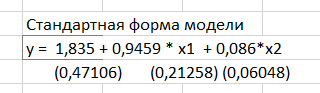

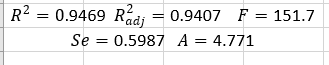

#Экономический смысл параметров

y - объём продукции (в тыс рублей) на одного рабочего показывает нам результат в зависимости от доп. факторов

x1 - увеличение финансирования от фондов по сравнению с прошлым годом
x2 - доля высококвалифицированных рабочих от общего числа

По форме моедли видно, что при значениях х1 и х2 равными 0 рабочий всё равно будет создавать продукцию в размере 1835 руб

Если же вложения от фондов вырастут на процент, объём продукции увеличить на 945 рублей.

Увеличение же объёма специалистов мало скажется на увеличении объёма продукции - всего на 86 рублей

In [ ]:
summary(model)


Call:
lm(formula = y ~ x1 + x2, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.15134 -0.36423  0.06724  0.30358  1.22704 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.83531    0.47106   3.896 0.001162 ** 
x1           0.94595    0.21258   4.450 0.000351 ***
x2           0.08562    0.06048   1.416 0.174964    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5987 on 17 degrees of freedom
Multiple R-squared:  0.9469,	Adjusted R-squared:  0.9407 
F-statistic: 151.7 on 2 and 17 DF,  p-value: 1.45e-11


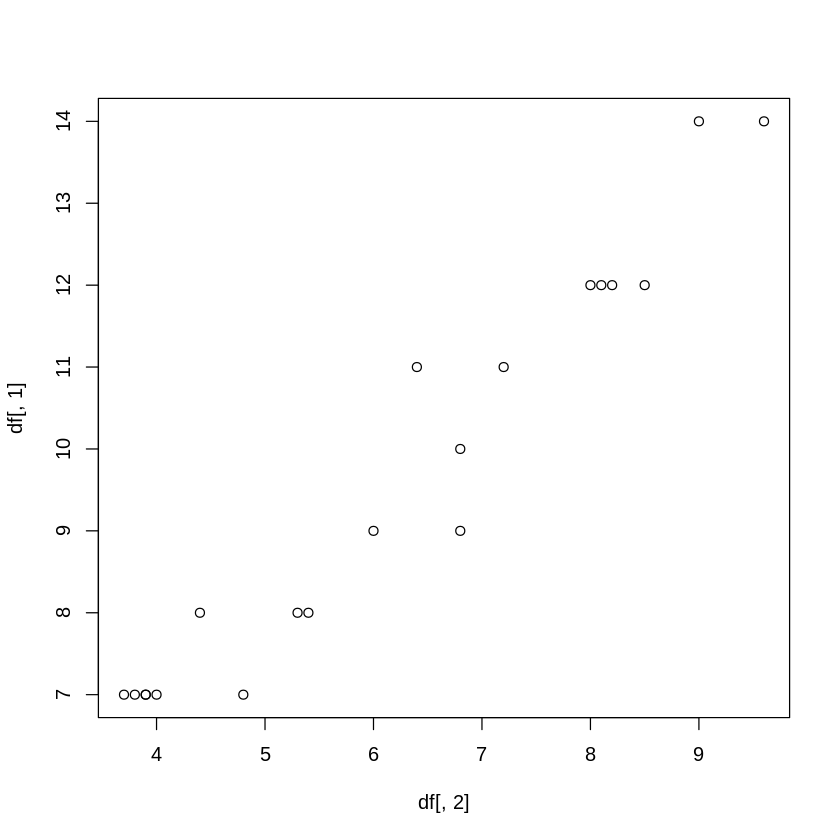

In [ ]:
plot(df[,2], df[,1])

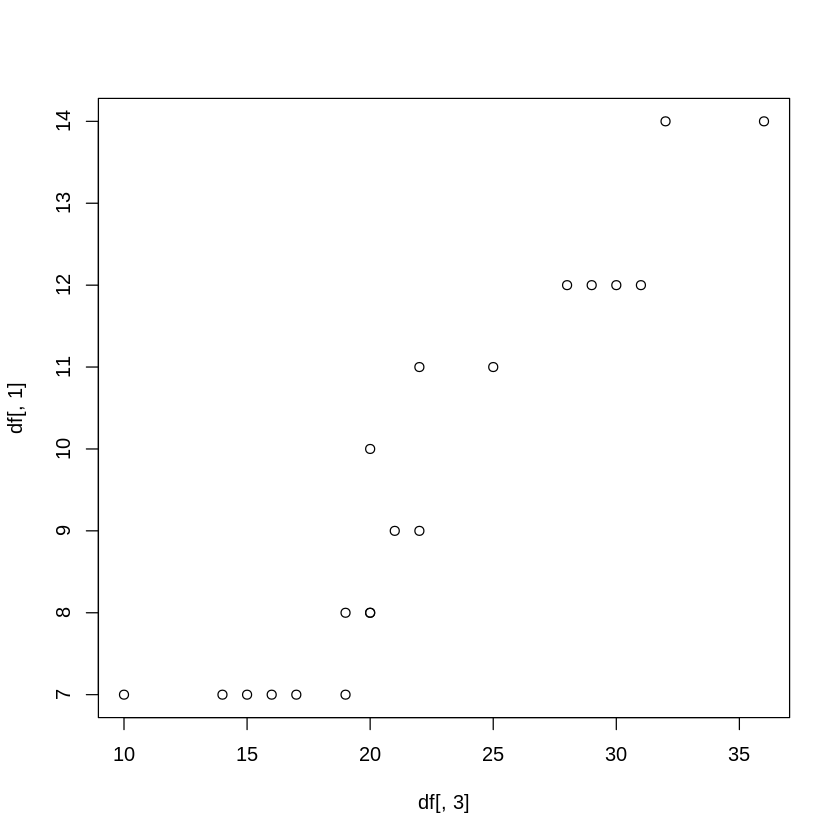

In [ ]:
plot(df[,3], df[,1])

#Вывод
Корреляция между x1 и x2 говорит о том, что доля высококвалифицированных рабочих (х2), сильно зависит от фисла станков (х1)

Также результат выработки (y) зависит от обоих факторов и коррелирует с ними

# Все последующие значения статистики берутся из summary  по модели регресии. Расчёты внутри языка R выполняются согласно указанным формулам


t-тест Стьюдента и гипотезы

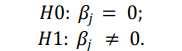

Формула t-значения

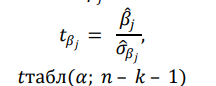

In [ ]:
#Задание 3

t_tabl <- 2.1098155778331806
t_b1 <- 1.83531 / 0.47106   
t_b2 <- 0.94595 / 0.21258
t_b3 <- 0.08562 / 0.06048

print(c('Табличное значение t-критерия Стьюдента:', t_tabl))
print(c('Критерий Стьюдента для первого параметра:', t_b1)) 
print(c('Критерий Стьюдента для второго параметра:', t_b2)) 
print(c('Критерий Стьюдента для третьего параметра:', t_b3)) 

[1] "Табличное значение t-критерия Стьюдента:"
[2] "2.10981557783318"                        
[1] "Критерий Стьюдента для первого параметра:"
[2] "3.8961278817985"                          
[1] "Критерий Стьюдента для второго параметра:"
[2] "4.44985417254681"                         
[1] "Критерий Стьюдента для третьего параметра:"
[2] "1.4156746031746"                           


Табличное значение критерия Стьдента < t-значения параметров b0 и b1 следовательно гипотеза H0 отвергается и парметры b0 и b1 значимы.

Для параметра b2 его t-значение меньше табличного, следовательно для него гипотеза H0 принимается и параметр не значим

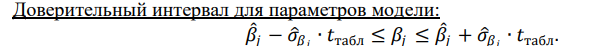

In [ ]:
print(c("Доверительный интервал b0: (", 1.83531 - 0.47106 * 2.10981557783318, 1.83531 + 0.47106 * 2.10981557783318, ')'))
print(c("Доверительный интервал b1: (", 0.94595 - 0.21258 * 2.10981557783318,  0.94595 + 0.21258 * 2.10981557783318, ')'))
print(c("Доверительный интервал b2: (", 0.08562 - 0.06048 * 2.10981557783318,  0.08562 + 0.06048 * 2.10981557783318, ')'))

[1] "Доверительный интервал b0: (" "0.841460273905902"           
[3] "2.8291597260941"              ")"                           
[1] "Доверительный интервал b1: (" "0.497445404464223"           
[3] "1.39445459553578"             ")"                           
[1] "Доверительный интервал b2: (" "-0.0419816461473507"         
[3] "0.213221646147351"            ")"                           


Ф-критерий Фишера и гипотезы

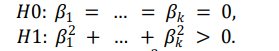

Формула занчения критерия Фишера

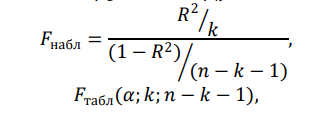

In [ ]:
#Задание 4
F_tabl <- 19.436961378591906
F_model <- 151.7

Значения Fкритерия Фишера для модели больше табличного для заданного кол-ва наблюдений и параметров, следовательно гипотеза H0 отвергается и модель значима. 

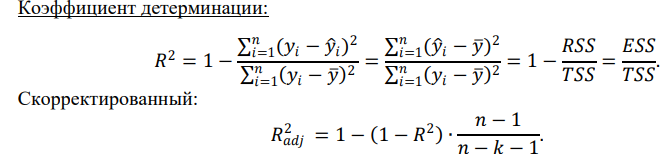

In [ ]:
R_2 <- 0.9469	
R_2_adj <- 0.9407

R^2 имеет очень хорошее значение, значит значение y очень хорошо обусловлено факторами модели.

Близость значений R^2 и R_adj^2 обусловлено достаточным колчиеством наблюдений в соотношении с количеством факторов

Ошибка аппроксимации

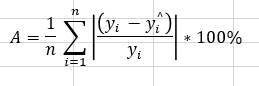

In [ ]:
#Ошибка аппроксимации
y_model <- predict(model)
apr_err <- sum(abs((df[,1] - y_model) / df[,1])) / 20 * 100

print(c('Ошибка апроксимации', apr_err))

[1] "Ошибка апроксимации" "4.77096825636589"   


Ошибка аппроксимации в процентах очень мала что свидетельствует о точности прогноза модели

Интервальная оценка прогнозируемых наблюдений

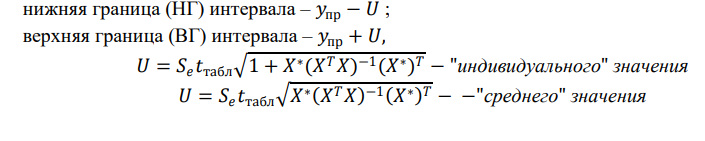

In [ ]:
#Задание 5

new_y_confidence <- predict(model, df1, interval = 'confidence')
new_y_confidence

,fit,lwr,upr
21,9.600000,9.317566,9.882434
22,13.998645,13.340364,14.656927
23,6.191491,5.494920,6.888063


In [ ]:
new_y_prediction <- predict(model, df1, interval = 'prediction')
new_y_prediction

,fit,lwr,upr
21,9.600000,8.305724,10.894276
22,13.998645,12.574315,15.422975
23,6.191491,4.749065,7.633918


In [ ]:
#Задание 6
import_model = df[, c(1,2)]
import_model

,y,x1
,<dbl>,<dbl>
1,7,3.9
2,7,3.9
3,7,3.7
4,7,4.0
5,7,3.8
6,7,4.8
7,8,5.4
8,8,4.4
9,8,5.3


In [ ]:
model2 = lm(y ~ 1 + x1, data = import_model)

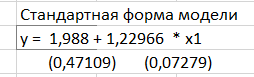

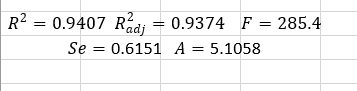

#Экономический смысл параметров в линейной модели

y - объём продукции (в тыс рублей) на одного рабочего показывает нам результат в зависимости от доп. факторов

x1 - увеличение финансирования от фондов по сравнению с прошлым годом
Параметр ч1 больше коррелирует с у

По форме моедли видно, что при значениях х1 и х2 равными 0 рабочий всё равно будет создавать продукцию в размере 1988 руб

Если же вложения от фондов вырастут на процент, объём продукции увеличить на 1229 рублей.


In [ ]:
summary(model2)


Call:
lm(formula = y ~ 1 + x1, data = import_model)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3501 -0.3849  0.1255  0.2467  1.1418 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.98839    0.47109   4.221 0.000514 ***
x1           1.22966    0.07279  16.893 1.74e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6151 on 18 degrees of freedom
Multiple R-squared:  0.9407,	Adjusted R-squared:  0.9374 
F-statistic: 285.4 on 1 and 18 DF,  p-value: 1.736e-12


#Задание 7

В случае с моделью парной регрессии модель также явлется значимой, как и её параметры (F-test и t-тест отвергают гипотезы H0), значение R^2 близко по значению к модели множественной регресии.

Ошибка аппроксимация для парной модели ненамного больше для множественной модели.

Следовательно по всем критериям множественная регрессия лучше, но различие минимально при условии того, что мы отказались от одного из факторов

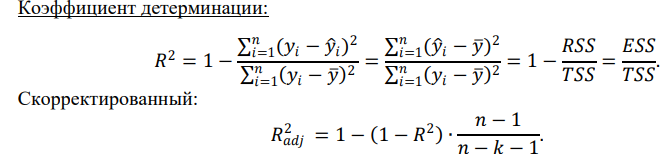

Ошибка аппроксимации

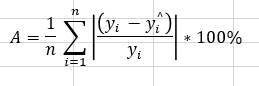

In [ ]:
y_model_2 <- predict(model2)
apr_err_2 <- sum(abs((import_model[,1] - y_model_2) / import_model[,1])) / 20 * 100

print(c('Ошибка апроксимации для новой модели', apr_err_2))

[1] "Ошибка апроксимации для новой модели"
[2] "5.10575843255104"                    
